In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.linalg import svd
from functions import *
from get_estimated_covariance import *
import scipy.stats
from scipy.interpolate import UnivariateSpline
%matplotlib inline
%load_ext autoreload
%autoreload 2

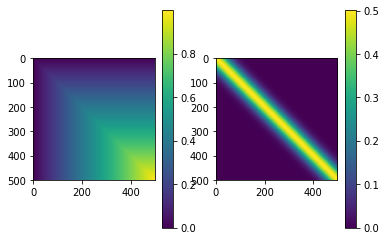

In [2]:
n = 500
t = np.linspace(0,1,n)
ma = np.meshgrid(t,t)
#bla = np.exp(-(ma[0]-ma[1])**2/0.01)
A = np.minimum(ma[0],ma[1]) + np.random.normal(0,0.0001,(n,n))
B = np.exp(-(ma[0]-ma[1])**2/0.01)/2 + np.random.normal(0,0.0001,(n,n))
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(B)
plt.colorbar()

In [3]:
eigA = np.linalg.eigh(A)
eigB = np.linalg.eigh(B)

In [222]:
r = 10
diagA = np.append(eigA[0][-r:], np.abs(np.random.normal(0,1,n-r)/np.arange(5000,5000 + n-r)**2))
diagB = np.append(eigB[0][-r:], np.abs(np.random.normal(0,1,n-r)/np.arange(1000,1000 + n-r)**2))
#rA = eigA[1][:,-r:] @ np.diag(eigA[0][-r:]) @ eigA[1][:,-r:].T
rA = eigA[1] @ np.diag(diagA) @ eigA[1].T
#rB = eigB[1][:,-r:] @ np.diag(eigB[0][-r:]) @ eigB[1][:,-r:].T
rB = eigB[1] @ np.diag(diagB) @ eigB[1].T

In [223]:
np.linalg.matrix_rank(rA)

500

In [28]:
rAbis = eigA[1][:,-r-1:] @ np.diag(eigA[0][-r-1:]) @ eigA[1][:,-r-1:].T

In [176]:
eigrA = np.linalg.eigh(rA)
eigrAbis = np.linalg.eigh(rAbis)

In [186]:
ormu = eigA[1][:,-11]

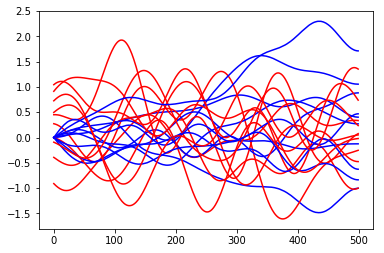

In [5]:
for _ in range(10):
    x = np.random.multivariate_normal(np.zeros(n), rA)
    plt.plot(x,'b')
    x = np.random.multivariate_normal(np.zeros(n), rB)
    plt.plot(x,'r')

In [6]:
np.linalg.matrix_rank(np.r_[rA,rB])

20

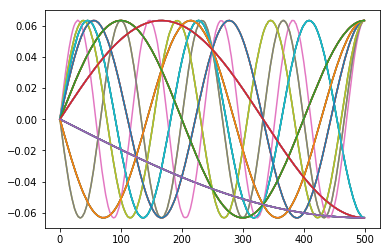

In [7]:
for i in range(1,r):
    plt.plot(eigA[1][:,-i:])

In [210]:
for i in range(n-r):
    for j in range(n-r):
        print(np.linalg.matrix_rank(rA[i:i+5,j:j+5]))

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [189]:
from scipy.stats import multivariate_normal

In [190]:
from scipy.linalg import sqrtm

In [283]:
srA = eigA[1][:,-r:] @ np.diag(np.sqrt(eigA[0][-r:])) @ eigA[1][:,-r:].T
srB = eigB[1][:,-r:] @ np.diag(np.sqrt(eigB[0][-r:])) @ eigB[1][:,-r:].T

In [191]:
def genrv(scov,N):
    x = np.random.multivariate_normal(np.zeros(n),np.eye(n),N)
    return x @ scov 

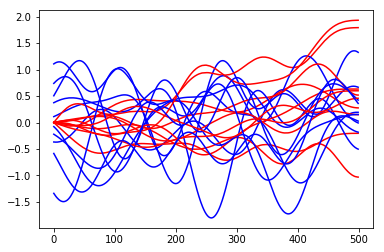

In [15]:
for _ in range(10):
    plt.plot(genrv(srA,1)[0],'r')
    plt.plot(genrv(srB,1)[0],'b')

In [376]:
res1 = []
res2 = []
x = genrv(srA,10)
for _ in range(10):
    res1.append(np.linalg.norm(np.linalg.pinv(srA) @ x[_]))
    res2.append(np.linalg.norm(np.linalg.pinv(srB) @ x[_]))
    print(np.linalg.norm(np.linalg.pinv(srB) @ x[_]))

722029149625.0
2.87380851506e+12
846217194787.0
5.6464229153e+12
2.5279748485e+12
2.90170019098e+12
4.09636234572e+12
4.42549427627e+12
4.36355874377e+12
3.56602555861e+12


In [373]:
np.log(np.mean(res2))

1.1272089211673371

In [374]:
np.log(np.min(res1))

1.0298737884403342

In [16]:
def logp(x, mu, scov, r):
    return np.sum(np.log(np.linalg.eigh(scov)[0][-r:])) - 0.5*np.linalg.norm(np.linalg.pinv(scov) @ x)

In [377]:
res1 = []
res2 = []
data1 = genrv(srA,1000)
data2 = genrv(srB,1000)
for _ in range(1000):
    res1.append(logp(data1[_],np.zeros(n),srA,r)-logp(data1[_],np.zeros(n),srB,r))
    res2.append(logp(data2[_],np.zeros(n),srA,r)-logp(data2[_],np.zeros(n),srB,r))

In [17]:
def logpfrag(x,mu,scov,r,i):
    frag = x[i:i+r]
    fcov = (scov @ scov)[i:i+r,i:i+r]
    ee = np.linalg.eigh(fcov)
    ssr = ee[1] @ np.diag(np.sqrt(ee[0])) @ ee[1].T
    return logp(frag,mu[i:i+r],ssr,r)

In [18]:
res1 = []
res2 = []
data1 = genrv(srA,10)
data2 = genrv(srB,10)
for _ in range(10):
    print(_)
    for __ in range(n-r):
        try:
            res1.append(logpfrag(data1[_],np.zeros(n),srA,r,__)-logpfrag(data1[_],np.zeros(n),srB,r,__))
            res2.append(logpfrag(data2[_],np.zeros(n),srA,r,__)-logpfrag(data2[_],np.zeros(n),srB,r,__))
        except:
            pass

0


/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


1
2
3
4
5
6
7
8
9


In [30]:
np.mean(np.array(res1)<0),np.mean(np.array(res2)>0)

(0.0022494887525562374, 0.29427402862985685)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc1243fa160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc1243fab70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc1243fd828>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc1243fd400>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc1243fa2b0>,
  <matplotlib.lines.Line2D at 0x7fc1244024e0>]}

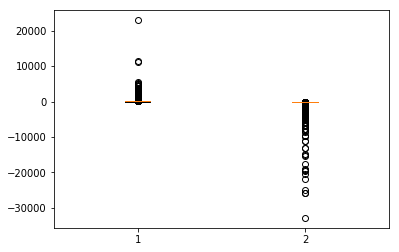

In [27]:
plt.boxplot(np.c_[res1,res2])

In [387]:
logpfrag(data1[0],np.zeros(n),srB,10,0)

-101.87711070761249

-10.0031265733
-30.5813020901
-9.18474275857
-22.0529349957
-12.7071691599
-26.7258365274
-13.0926764763
-28.4863388516
-13.2004689248
-52.7545298786
-10.3579576525
-52.6547341903
-11.3693174367
-30.8006318781
-12.0173461618
-36.1288686533
-11.4043118121
-32.771254247
-10.3697720987
-30.8660880679


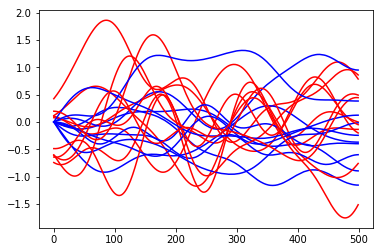

In [230]:
for _ in range(10):
    x = np.random.multivariate_normal(np.zeros(n), rA)
    plt.plot(x,'b')
    print(logp(x,np.zeros(n),rA,r)-logp(x,np.zeros(n),rB,r))
    x = np.random.multivariate_normal(np.zeros(n), rB)
    plt.plot(x,'r')
    print(logp(x,np.zeros(n),rA,r)-logp(x,np.zeros(n),rB,r))
    

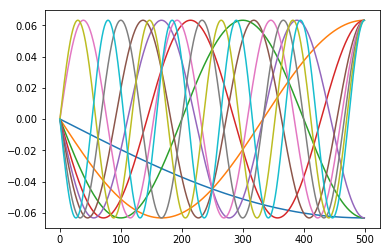

In [3]:
ss = svd(bla)
for i in range(10):
    plt.plot(ss[0][:,i])

In [289]:
mu = eigA[1][:,-10]

In [290]:
disc = np.linalg.inv(rA) @ mu

In [279]:
srA = eigA[1] @ np.diag(np.sqrt(diagA)) @ eigA[1].T

In [280]:
data = genrv(srA,10)

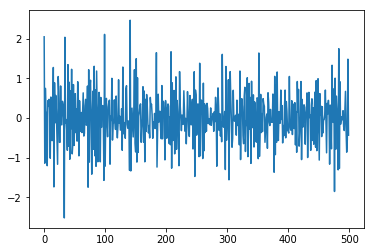

In [281]:
x = np.random.normal(0,1,500)
y = srA @ x
plt.plot(y)

In [291]:
data1 = genrv(srA,1000)
data2 = genrv(srA,1000) + mu

In [292]:
def disctest(x):
    return (disc @ x)**2 - (disc @ (x-ormu))**2

In [293]:
res = np.zeros((1,2))
for _ in range(1000):
    res = np.r_[res,np.array([disctest(data1[_]),disctest(data2[_])]).reshape((1,2))]
res=res[1:]

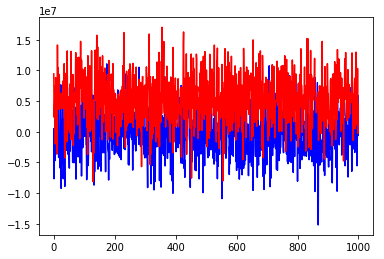

In [294]:
plt.plot(res[:,0],'b')
plt.plot(res[:,1],'r')

In [295]:
np.mean(res[:,0]<0),np.mean(res[:,1]>0)

(0.53300000000000003, 0.91200000000000003)

In [5]:
K2 = np.exp(-(ma[0]-ma[1])**2/0.01)

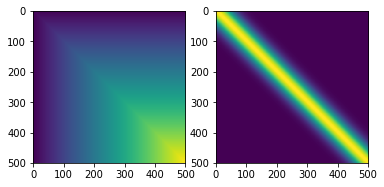

In [32]:
plt.subplot(1, 2, 1)
plt.imshow(bla)

plt.subplot(1, 2, 2)
plt.imshow(K2)

In [8]:
np.linalg.matrix_rank(bla), np.linalg.matrix_rank(K2)

(499, 41)

In [29]:
np.linalg.matrix_rank(np.c_[bla,K2])

500

In [36]:
eigs1 = np.linalg.eigh(bla)
eigs2 = np.linalg.eigh(K2)

In [99]:
r = 10
A = eigs1[1][:,-r:] @ np.diag(eigs1[0][-r:]) @ eigs1[1][:,-r:].T
B = eigs2[1][:,-r:] @ np.diag(eigs2[0][-r:]) @ eigs2[1][:,-r:].T
B2 = eigs2[1][:,-r+1:] @ np.diag(eigs2[0][-r+1:]) @ eigs2[1][:,-r+1:].T + eigs1[1][:,-1:] @ np.diag(eigs1[0][-1:]) @ eigs1[1][:,-1:].T

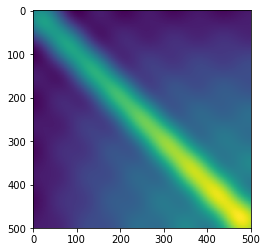

In [100]:
plt.imshow(B2)

In [105]:
#x = np.random.multivariate_normal(np.zeros(n), ss[0] @ np.diag(1/np.arange(1,n+1)**2) @ ss[0].T)
x = np.random.multivariate_normal(np.zeros(n), A)

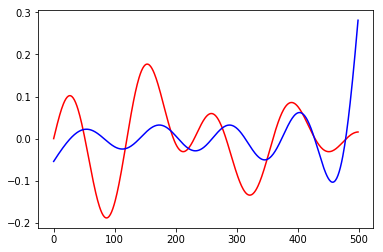

In [115]:
plt.plot(np.linalg.pinv(A)@ x,'r')
plt.plot(np.linalg.pinv(B2)@ x,'b')

In [15]:
K2 = K2 / 2

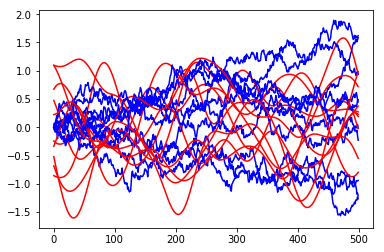

In [16]:
for _ in range(10):
    x = np.random.multivariate_normal(np.zeros(n), bla)
    plt.plot(x,'b')
    x = np.random.multivariate_normal(np.zeros(n), K2)
    plt.plot(x,'r')

In [17]:
np.trace(bla), np.trace(K2)

(250.0, 250.0)

In [18]:
from scipy.linalg import sqrtm
from scipy.stats import multivariate_normal

In [30]:
x = np.random.multivariate_normal(np.zeros(n), K2)

In [22]:
multivariate_normal.pdf(x, mean=np.zeros(n),cov=bla)

LinAlgError: singular matrix

In [26]:
SI = sqrtm(np.linalg.pinv(bla))

Matrix is singular and may not have a square root.


In [31]:
x.T @ SI @ x

193.66878566717924

In [145]:
D = np.linalg.pinv(sqrtm(bla)) @ K2 @ np.linalg.pinv(sqrtm(bla))
eigs = np.linalg.eigh(D)
def radon(x):
    al = eigs[0]
    ans = np.sum(np.array([((al[i]-1)/al[i])*(np.sum((sqrtm(bla)@ eigs[1][:,i])*x))**2 - np.log(al[i])]) for i in range(n))
    ans = 0.5 * ans
    ans = np.exp(ans)
    return ans

Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.


In [146]:
eigs[0]

array([ -2.19115395e-14,  -1.36163835e-14,  -1.01666225e-14,
         0.00000000e+00,   1.23238703e-14,   1.24003970e-14,
         3.91962041e-14,   3.41865941e-13,   2.09190117e-12,
         1.14989234e-11,   5.82188598e-11,   2.74837885e-10,
         1.21780872e-09,   5.08993173e-09,   2.01469269e-08,
         7.57654766e-08,   2.71425226e-07,   9.28304849e-07,
         3.03647979e-06,   9.51321952e-06,   2.85812329e-05,
         8.24227811e-05,   2.28323640e-04,   6.07908070e-04,
         1.55621315e-03,   3.83138551e-03,   9.07144376e-03,
         2.06568535e-02,   4.51972955e-02,   9.50507869e-02,
         1.90848829e-01,   3.42536951e-01,   3.94727797e-01,
         7.06105888e-01,   1.24233486e+00,   2.11992364e+00,
         3.00454676e+00,   3.70064405e+00,   5.35634771e+00,
         7.80109217e+00,   8.40117458e+00,   1.15780117e+01,
         1.34252326e+01,   1.61340241e+01,   1.80629353e+01,
         2.09399105e+01,   2.19807493e+01,   2.44564341e+01,
         2.47253643e+01,

In [136]:
res = np.zeros((1,2))
for _ in range(100):
    x = np.random.multivariate_normal(np.zeros(n), bla)
    y = np.random.multivariate_normal(np.zeros(n), K2)
    lol1, lol2 = radon(x),radon(y)
    res = np.r_[res,np.array([lol1,lol2]).reshape((1,2))]
    print(lol1,lol2)

Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.


/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not 

/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars
/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars
/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not have a square root.
Matrix is singular and may not 

KeyboardInterrupt: 

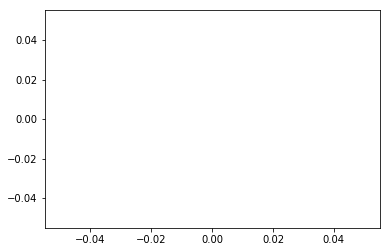

In [128]:
plt.plot(res[:,1]-res[:,0])

In [129]:
np.mean((res[:,1]-res[:,0])>0)

/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


0.0

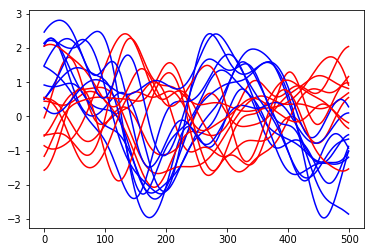

In [536]:
mu = 20*ss[0][:,3]
#mu = 2 * t
data1 = np.random.multivariate_normal(np.zeros(n), bla,50)
data2 = mu + np.random.multivariate_normal(np.zeros(n), bla,50)
for _ in range(10):
    plt.plot(data1[_],'r')
    plt.plot(data2[_],'b')

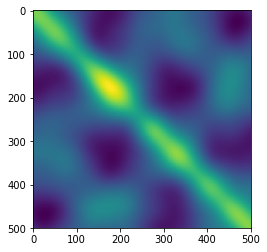

In [537]:
K = np.cov(np.r_[data1,data2].T)
plt.imshow(K)

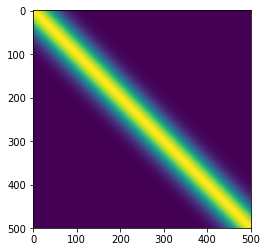

In [538]:
plt.imshow(bla)

In [539]:
estmu = (data2-data1).mean(0)

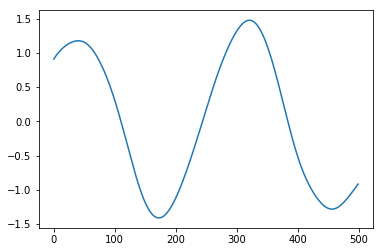

In [540]:
plt.plot(estmu)

In [520]:
#ss = svd(K)

In [521]:
m = 20
dia = np.zeros(n); dia[:m] = 1; dia = dia * ss[1]; dia = np.diag(dia) 
#psi = np.linalg.solve(ss[0][:,:m] @ np.diag(1/ss[1][:m]) @ ss[0][:,:m].T, estmu) 
psi = ss[0][:,:m] @ ((1/ss[1][:m]) * (ss[0][:,:m].T @ estmu))

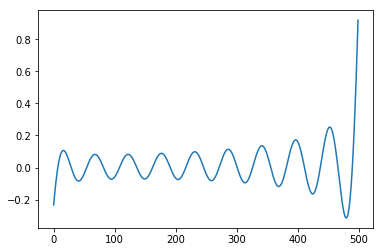

In [522]:
plt.plot(psi)

In [523]:
def test(X,data1,data2,psi):
    m1 = data1.mean(0)
    m2 = data2.mean(0)
    return np.sum((X-((m1+m2)/2))*psi) * np.sum((m2-m1)*psi)

In [524]:
results = np.zeros((50,2))
for i in range(50):
    results[i] = test(data1[i],data1,data2,psi),test(data2[i],data1,data2,psi)

In [525]:
np.mean(results[:,0]<0), np.mean(results[:,1]>0)

(0.93999999999999995, 0.95999999999999996)

In [672]:
a = np.random.normal(0,0.001,n)

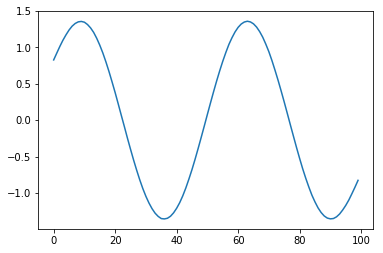

In [673]:
n = 100
t = np.linspace(0,1,n)
ma = np.meshgrid(t,t)
bla = np.exp(-(ma[0]-ma[1])**2/0.01)

ss = svd(bla)
mu = 10 * ss[0][:,3] 
plt.plot(mu+a)

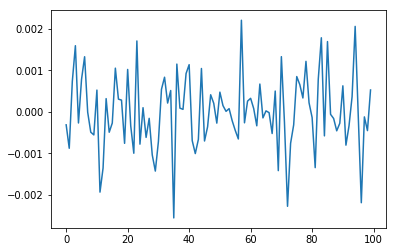

In [674]:
plt.plot(a)

In [696]:
def run(m):
    print(m)
    n = 100
    t = np.linspace(0,1,n)
    ma = np.meshgrid(t,t)
    bla = np.exp(-(ma[0]-ma[1])**2/0.01)
    
    ss = svd(bla)
    mu = 10 * ss[0][:,3]
    
    rep = 1000
    res = 0
    for _ in range(rep):
        data1 = np.random.multivariate_normal(np.zeros(n), bla,50)
        data2 = mu + np.random.multivariate_normal(np.zeros(n), bla,50)
        K = np.cov(np.r_[data1,data2].T)
        ss = svd(K)
        eigf = ss[0] * np.sqrt(n)
        
        m1 = data1.mean(0)
        m2 = data2.mean(0)
        
        psi = eigf[:,:m] @ ((1/ss[1][:m]) * (eigf[:,:m].T @ (m2-m1)))

        X1 = np.random.multivariate_normal(np.zeros(n), bla, 50)
        X2 = mu + np.random.multivariate_normal(np.zeros(n), bla, 50)
        for i in range(50):
            te = np.sum((X1[i]-((m1+m2)/2))*psi) * np.sum((m2-m1)*psi)
            if te<0: res+=1
            te = np.sum((X2[i]-((m1+m2)/2))*psi) * np.sum((m2-m1)*psi)
            if te>0: res+=1
    return res,(rep*100), res/(rep*100)

In [697]:
rrt = [run(m) for m in range(1,21)]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


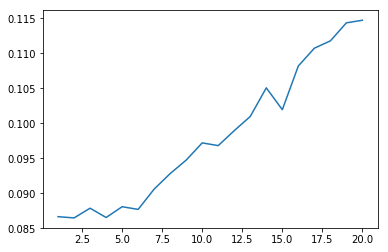

In [701]:
plt.plot(np.arange(1,21),1-np.array([uu[2] for uu in rrt]))

In [702]:
run(4)

4


(91472, 100000, 0.91472)

0.92038145629462942

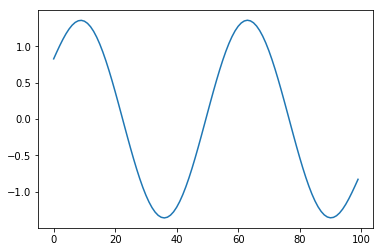

In [691]:
n = 100
t = np.linspace(0,1,n)
ma = np.meshgrid(t,t)
bla = np.exp(-(ma[0]-ma[1])**2/0.01)
ss = svd(bla)
mu = 10 * ss[0][:,3] 
plt.plot(mu)
zz = np.linalg.solve(sqrtm(bla), mu)
rv = scipy.stats.norm()
rv.cdf(np.linalg.norm(zz)/2)